<a href="https://colab.research.google.com/github/manishmcsa/Assgnment9/blob/main/Assignment9_Solution_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Assignment9"

/content/drive/MyDrive/Assignment9


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from data_load_with_albumentations import *
from models import *
from results import plot_misclassified_images, plot_graph
from train import train
from test import test
from utils import *
from config import ModelConfig
from visualize import VisualizeCam

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}

CUDA Available


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


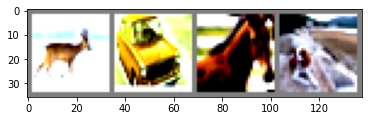

In [ ]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [ ]:
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
#device = which_device()
model = ResNet18().to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.8867661952972412 Batch_id=781 Accuracy=46.92: 100%|██████████| 782/782 [01:11<00:00, 11.00it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0182, Accuracy: 5769/10000 (57.69%)

EPOCH: 2


Loss=0.6816190481185913 Batch_id=781 Accuracy=64.84: 100%|██████████| 782/782 [01:11<00:00, 10.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0142, Accuracy: 6793/10000 (67.93%)

EPOCH: 3


Loss=1.2348226308822632 Batch_id=781 Accuracy=72.57: 100%|██████████| 782/782 [01:11<00:00, 10.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0128, Accuracy: 7199/10000 (71.99%)

EPOCH: 4


Loss=0.6173083782196045 Batch_id=781 Accuracy=76.87: 100%|██████████| 782/782 [01:12<00:00, 10.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 7787/10000 (77.87%)

EPOCH: 5


Loss=1.0389645099639893 Batch_id=781 Accuracy=80.07: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 7868/10000 (78.68%)

EPOCH: 6


Loss=0.7689259648323059 Batch_id=781 Accuracy=82.44: 100%|██████████| 782/782 [01:12<00:00, 10.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 8069/10000 (80.69%)

EPOCH: 7


Loss=0.48036444187164307 Batch_id=781 Accuracy=84.63: 100%|██████████| 782/782 [01:12<00:00, 10.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 8191/10000 (81.91%)

EPOCH: 8


Loss=0.34344932436943054 Batch_id=781 Accuracy=86.01: 100%|██████████| 782/782 [01:12<00:00, 10.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 8202/10000 (82.02%)

EPOCH: 9


Loss=0.35024160146713257 Batch_id=781 Accuracy=87.47: 100%|██████████| 782/782 [01:12<00:00, 10.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8232/10000 (82.32%)

EPOCH: 10


Loss=0.4300500154495239 Batch_id=781 Accuracy=88.78: 100%|██████████| 782/782 [01:12<00:00, 10.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8431/10000 (84.31%)

EPOCH: 11


Loss=0.43720659613609314 Batch_id=781 Accuracy=89.85: 100%|██████████| 782/782 [01:12<00:00, 10.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8383/10000 (83.83%)

EPOCH: 12


Loss=0.8866771459579468 Batch_id=781 Accuracy=90.49: 100%|██████████| 782/782 [01:11<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8348/10000 (83.48%)

EPOCH: 13


Loss=0.14333182573318481 Batch_id=781 Accuracy=91.27: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 8402/10000 (84.02%)

EPOCH: 14


Loss=0.14295852184295654 Batch_id=781 Accuracy=91.96: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8382/10000 (83.82%)

EPOCH: 15


Loss=0.12752561271190643 Batch_id=781 Accuracy=92.76: 100%|██████████| 782/782 [01:11<00:00, 10.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8493/10000 (84.93%)

EPOCH: 16


Loss=0.6401199698448181 Batch_id=781 Accuracy=93.35: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 89 %
Accuracy of  bird : 81 %
Accuracy of   cat : 81 %
Accuracy of  deer : 82 %
Accuracy of   dog : 73 %
Accuracy of  frog : 87 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 88 %

Test set: Average loss: 0.0072, Accuracy: 8550/10000 (85.50%)

EPOCH: 17


Loss=0.3748157322406769 Batch_id=781 Accuracy=93.80: 100%|██████████| 782/782 [01:11<00:00, 10.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8437/10000 (84.37%)

EPOCH: 18


Loss=0.061146851629018784 Batch_id=781 Accuracy=94.06: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 84 %
Accuracy of   car : 88 %
Accuracy of  bird : 80 %
Accuracy of   cat : 76 %
Accuracy of  deer : 83 %
Accuracy of   dog : 81 %
Accuracy of  frog : 95 %
Accuracy of horse : 89 %
Accuracy of  ship : 93 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0073, Accuracy: 8543/10000 (85.43%)

EPOCH: 19


Loss=0.0615263469517231 Batch_id=781 Accuracy=94.83: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 87 %
Accuracy of  bird : 69 %
Accuracy of   cat : 66 %
Accuracy of  deer : 82 %
Accuracy of   dog : 75 %
Accuracy of  frog : 95 %
Accuracy of horse : 86 %
Accuracy of  ship : 94 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0075, Accuracy: 8554/10000 (85.54%)

EPOCH: 20


Loss=0.28503233194351196 Batch_id=781 Accuracy=95.14: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 92 %
Accuracy of  bird : 72 %
Accuracy of   cat : 56 %
Accuracy of  deer : 77 %
Accuracy of   dog : 90 %
Accuracy of  frog : 92 %
Accuracy of horse : 94 %
Accuracy of  ship : 96 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0074, Accuracy: 8583/10000 (85.83%)

EPOCH: 21


Loss=0.013039878569543362 Batch_id=781 Accuracy=95.53: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 8440/10000 (84.40%)

EPOCH: 22


Loss=0.1705114245414734 Batch_id=781 Accuracy=95.63: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 88 %
Accuracy of  bird : 77 %
Accuracy of   cat : 84 %
Accuracy of  deer : 94 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 89 %
Accuracy of  ship : 93 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0072, Accuracy: 8653/10000 (86.53%)

EPOCH: 23


Loss=0.053812380880117416 Batch_id=781 Accuracy=95.90: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 94 %
Accuracy of  bird : 90 %
Accuracy of   cat : 80 %
Accuracy of  deer : 73 %
Accuracy of   dog : 57 %
Accuracy of  frog : 90 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0073, Accuracy: 8612/10000 (86.12%)

EPOCH: 24


Loss=0.4094511866569519 Batch_id=781 Accuracy=96.19: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 8458/10000 (84.58%)

EPOCH: 25


Loss=0.11348074674606323 Batch_id=781 Accuracy=96.11: 100%|██████████| 782/782 [01:11<00:00, 10.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 79 %
Accuracy of   car : 93 %
Accuracy of  bird : 84 %
Accuracy of   cat : 67 %
Accuracy of  deer : 73 %
Accuracy of   dog : 82 %
Accuracy of  frog : 89 %
Accuracy of horse : 83 %
Accuracy of  ship : 89 %
Accuracy of truck : 77 %

Test set: Average loss: 0.0076, Accuracy: 8567/10000 (85.67%)

EPOCH: 26


Loss=0.15563271939754486 Batch_id=781 Accuracy=96.59: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 82 %
Accuracy of   cat : 62 %
Accuracy of  deer : 87 %
Accuracy of   dog : 70 %
Accuracy of  frog : 98 %
Accuracy of horse : 85 %
Accuracy of  ship : 90 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0072, Accuracy: 8659/10000 (86.59%)

EPOCH: 27


Loss=0.11608308553695679 Batch_id=781 Accuracy=96.72: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 98 %
Accuracy of   car : 92 %
Accuracy of  bird : 85 %
Accuracy of   cat : 57 %
Accuracy of  deer : 85 %
Accuracy of   dog : 85 %
Accuracy of  frog : 93 %
Accuracy of horse : 83 %
Accuracy of  ship : 85 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0073, Accuracy: 8644/10000 (86.44%)

EPOCH: 28


Loss=0.32310858368873596 Batch_id=781 Accuracy=97.00: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 88 %
Accuracy of  deer : 96 %
Accuracy of   dog : 62 %
Accuracy of  frog : 92 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0080, Accuracy: 8578/10000 (85.78%)

EPOCH: 29


Loss=0.15145421028137207 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 90 %
Accuracy of  bird : 78 %
Accuracy of   cat : 73 %
Accuracy of  deer : 96 %
Accuracy of   dog : 68 %
Accuracy of  frog : 90 %
Accuracy of horse : 95 %
Accuracy of  ship : 91 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0081, Accuracy: 8600/10000 (86.00%)

EPOCH: 30


Loss=0.24567186832427979 Batch_id=781 Accuracy=97.06: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 98 %
Accuracy of   car : 92 %
Accuracy of  bird : 80 %
Accuracy of   cat : 76 %
Accuracy of  deer : 80 %
Accuracy of   dog : 71 %
Accuracy of  frog : 84 %
Accuracy of horse : 88 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0072, Accuracy: 8668/10000 (86.68%)

EPOCH: 31


Loss=0.05216033384203911 Batch_id=781 Accuracy=97.17: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 95 %
Accuracy of  bird : 79 %
Accuracy of   cat : 70 %
Accuracy of  deer : 75 %
Accuracy of   dog : 83 %
Accuracy of  frog : 86 %
Accuracy of horse : 95 %
Accuracy of  ship : 92 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0074, Accuracy: 8659/10000 (86.59%)

EPOCH: 32


Loss=0.05148591846227646 Batch_id=781 Accuracy=97.21: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 85 %
Accuracy of  bird : 92 %
Accuracy of   cat : 77 %
Accuracy of  deer : 84 %
Accuracy of   dog : 73 %
Accuracy of  frog : 80 %
Accuracy of horse : 92 %
Accuracy of  ship : 91 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0073, Accuracy: 8693/10000 (86.93%)

EPOCH: 33


Loss=0.24692344665527344 Batch_id=781 Accuracy=97.53: 100%|██████████| 782/782 [01:12<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 88 %
Accuracy of  bird : 78 %
Accuracy of   cat : 74 %
Accuracy of  deer : 84 %
Accuracy of   dog : 87 %
Accuracy of  frog : 88 %
Accuracy of horse : 96 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0070, Accuracy: 8733/10000 (87.33%)

EPOCH: 34


Loss=0.26180073618888855 Batch_id=781 Accuracy=97.51: 100%|██████████| 782/782 [01:11<00:00, 10.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 80 %
Accuracy of   cat : 68 %
Accuracy of  deer : 93 %
Accuracy of   dog : 76 %
Accuracy of  frog : 87 %
Accuracy of horse : 89 %
Accuracy of  ship : 96 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0072, Accuracy: 8690/10000 (86.90%)

EPOCH: 35


Loss=0.008694106712937355 Batch_id=781 Accuracy=97.73: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 93 %
Accuracy of  bird : 81 %
Accuracy of   cat : 76 %
Accuracy of  deer : 83 %
Accuracy of   dog : 76 %
Accuracy of  frog : 92 %
Accuracy of horse : 95 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0075, Accuracy: 8676/10000 (86.76%)

EPOCH: 36


Loss=0.025925714522600174 Batch_id=781 Accuracy=97.71: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 90 %
Accuracy of  bird : 81 %
Accuracy of   cat : 68 %
Accuracy of  deer : 89 %
Accuracy of   dog : 84 %
Accuracy of  frog : 89 %
Accuracy of horse : 87 %
Accuracy of  ship : 92 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0074, Accuracy: 8684/10000 (86.84%)

EPOCH: 37


Loss=0.037267040461301804 Batch_id=781 Accuracy=97.88: 100%|██████████| 782/782 [01:12<00:00, 10.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 98 %
Accuracy of  bird : 73 %
Accuracy of   cat : 67 %
Accuracy of  deer : 76 %
Accuracy of   dog : 83 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 90 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0071, Accuracy: 8731/10000 (87.31%)

EPOCH: 38


Loss=0.05948891118168831 Batch_id=781 Accuracy=98.01: 100%|██████████| 782/782 [01:11<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 55 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 85 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0076, Accuracy: 8698/10000 (86.98%)

EPOCH: 39


Loss=0.29454758763313293 Batch_id=781 Accuracy=97.96: 100%|██████████| 782/782 [01:12<00:00, 10.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 91 %
Accuracy of   car : 95 %
Accuracy of  bird : 81 %
Accuracy of   cat : 64 %
Accuracy of  deer : 83 %
Accuracy of   dog : 87 %
Accuracy of  frog : 92 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0078, Accuracy: 8689/10000 (86.89%)

EPOCH: 40


Loss=0.019763832911849022 Batch_id=781 Accuracy=97.84: 100%|██████████| 782/782 [01:12<00:00, 10.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 91 %
Accuracy of  bird : 82 %
Accuracy of   cat : 77 %
Accuracy of  deer : 84 %
Accuracy of   dog : 82 %
Accuracy of  frog : 87 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0072, Accuracy: 8702/10000 (87.02%)

EPOCH: 41


Loss=0.05686772242188454 Batch_id=781 Accuracy=98.08: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 89 %
Accuracy of  bird : 77 %
Accuracy of   cat : 78 %
Accuracy of  deer : 88 %
Accuracy of   dog : 76 %
Accuracy of  frog : 93 %
Accuracy of horse : 91 %
Accuracy of  ship : 95 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0070, Accuracy: 8756/10000 (87.56%)

EPOCH: 42


Loss=0.1095689982175827 Batch_id=781 Accuracy=98.10: 100%|██████████| 782/782 [01:11<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 98 %
Accuracy of  bird : 77 %
Accuracy of   cat : 81 %
Accuracy of  deer : 84 %
Accuracy of   dog : 79 %
Accuracy of  frog : 95 %
Accuracy of horse : 84 %
Accuracy of  ship : 95 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0069, Accuracy: 8778/10000 (87.78%)

EPOCH: 43


Loss=0.05930527299642563 Batch_id=781 Accuracy=98.14: 100%|██████████| 782/782 [01:11<00:00, 10.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 77 %
Accuracy of   car : 94 %
Accuracy of  bird : 85 %
Accuracy of   cat : 68 %
Accuracy of  deer : 94 %
Accuracy of   dog : 80 %
Accuracy of  frog : 95 %
Accuracy of horse : 87 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0075, Accuracy: 8691/10000 (86.91%)

EPOCH: 44


Loss=0.14382727444171906 Batch_id=781 Accuracy=98.43: 100%|██████████| 782/782 [01:12<00:00, 10.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 96 %
Accuracy of  bird : 80 %
Accuracy of   cat : 76 %
Accuracy of  deer : 93 %
Accuracy of   dog : 77 %
Accuracy of  frog : 93 %
Accuracy of horse : 94 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0068, Accuracy: 8790/10000 (87.90%)

EPOCH: 45


Loss=0.014232676476240158 Batch_id=781 Accuracy=98.23: 100%|██████████| 782/782 [01:11<00:00, 10.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 91 %
Accuracy of  bird : 91 %
Accuracy of   cat : 71 %
Accuracy of  deer : 91 %
Accuracy of   dog : 74 %
Accuracy of  frog : 90 %
Accuracy of horse : 89 %
Accuracy of  ship : 89 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0071, Accuracy: 8782/10000 (87.82%)

EPOCH: 46


Loss=0.030021458864212036 Batch_id=781 Accuracy=98.38: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 95 %
Accuracy of  bird : 83 %
Accuracy of   cat : 76 %
Accuracy of  deer : 81 %
Accuracy of   dog : 77 %
Accuracy of  frog : 85 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0068, Accuracy: 8789/10000 (87.89%)

EPOCH: 47


Loss=0.15112321078777313 Batch_id=781 Accuracy=98.29: 100%|██████████| 782/782 [01:11<00:00, 10.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 95 %
Accuracy of  bird : 90 %
Accuracy of   cat : 76 %
Accuracy of  deer : 82 %
Accuracy of   dog : 73 %
Accuracy of  frog : 93 %
Accuracy of horse : 94 %
Accuracy of  ship : 90 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0072, Accuracy: 8764/10000 (87.64%)

EPOCH: 48


Loss=0.1661188155412674 Batch_id=781 Accuracy=98.44: 100%|██████████| 782/782 [01:11<00:00, 10.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 90 %
Accuracy of  bird : 77 %
Accuracy of   cat : 80 %
Accuracy of  deer : 84 %
Accuracy of   dog : 79 %
Accuracy of  frog : 87 %
Accuracy of horse : 85 %
Accuracy of  ship : 92 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0070, Accuracy: 8802/10000 (88.02%)

EPOCH: 49


Loss=0.0894566997885704 Batch_id=781 Accuracy=98.44: 100%|██████████| 782/782 [01:12<00:00, 10.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 78 %
Accuracy of   car : 98 %
Accuracy of  bird : 85 %
Accuracy of   cat : 65 %
Accuracy of  deer : 91 %
Accuracy of   dog : 85 %
Accuracy of  frog : 89 %
Accuracy of horse : 88 %
Accuracy of  ship : 98 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0071, Accuracy: 8755/10000 (87.55%)

EPOCH: 50


Loss=0.008104294538497925 Batch_id=781 Accuracy=98.45: 100%|██████████| 782/782 [01:12<00:00, 10.86it/s]
/content/drive/My Drive/Assignment9/test.py:24: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]



Accuracy of plane : 88 %
Accuracy of   car : 93 %
Accuracy of  bird : 86 %
Accuracy of   cat : 63 %
Accuracy of  deer : 85 %
Accuracy of   dog : 81 %
Accuracy of  frog : 95 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0070, Accuracy: 8768/10000 (87.68%)



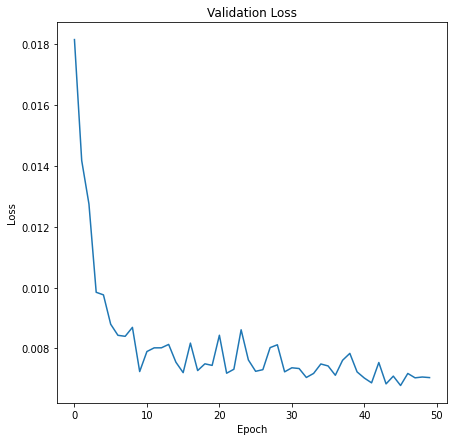

In [ ]:
plot_graph(test_losses, "Loss")

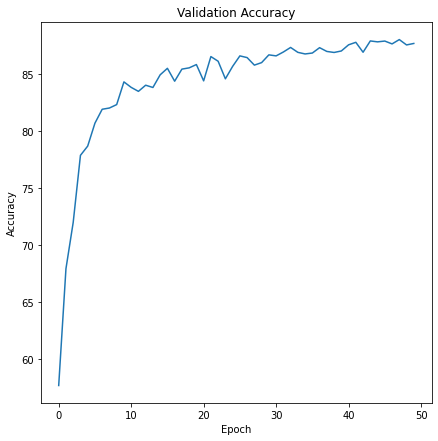

In [ ]:
plot_graph(test_accs, "Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

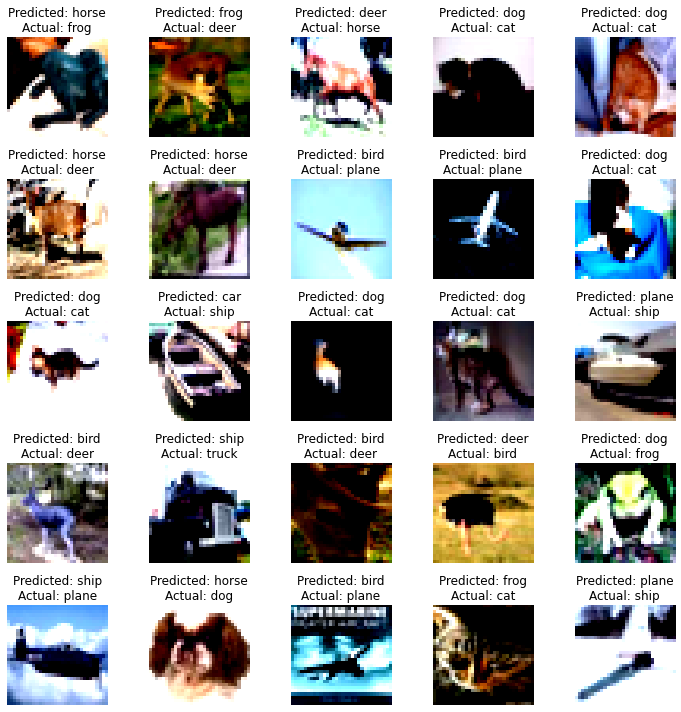

In [ ]:
plot_misclassified_images(misclassified_imgs, data.classes, "misclassified_imgs.png")

In [ ]:
#Visualize GradCam
#Use GradCam to understand where the network is looking at while prediction
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,data.classes, target_layers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

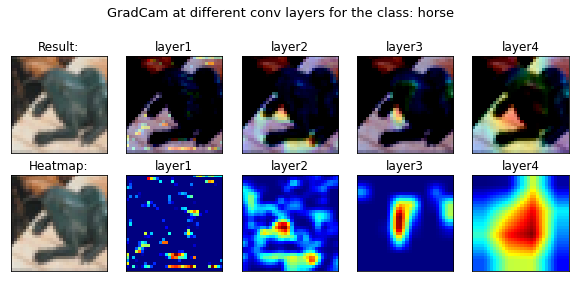

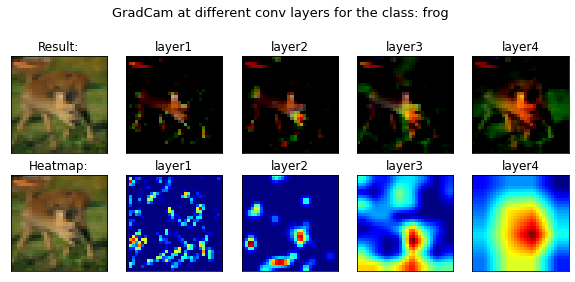

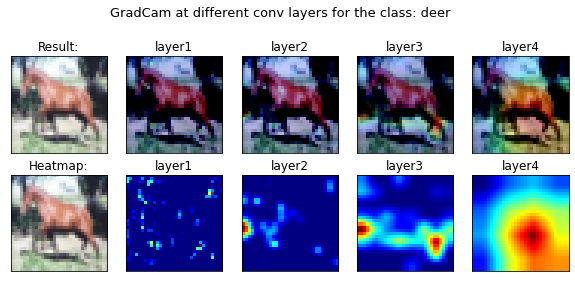

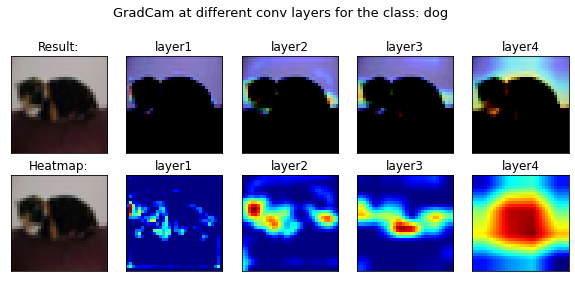

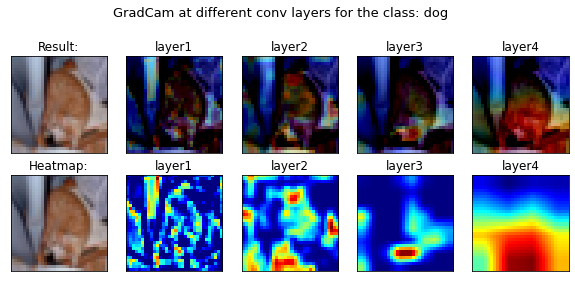

In [ ]:
#GradCam for incorrectly classified images
incorrect_pred_imgs = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")